# Copied from a different directory on 1/12/2021. Likely need to adjust some file paths/directories

In [1]:
import sys, glob, csv
# sys.path.append('../../../')
sys.path.insert(0, 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\EIS')
import numpy as np
from scipy.optimize import minimize
from scipy import optimize

import matplotlib.pyplot as plt
import matplotlib.ticker

from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist, plot_residuals, plot_bode
from impedance.preprocessing import readAutolab, readZPlot
from impedance.preprocessing import readVersaStudio, ignoreBelowX

import ImpedanceCorrection as IC
%reload_ext autoreload
%autoreload 2

G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\NoHoleAl2O3_8h_700C_1%_EIS-2.z

Name: 1%_EIS-2.z
Circuit string: L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)
Fit: True

Initial guesses:
    L_0 = 1.68e-06 [H]
    R_0 = 4.10e+00 [Ohm]
    R_1 = 2.00e+02 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 7.00e-01 []
    R_2 = 2.00e+02 [Ohm]
  CPE2_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE2_1 = 4.00e-01 []

Fit parameters:
    L_0 = 5.29e-07  (+/- 1.62e-07) [H]
    R_0 = 3.01e+00  (+/- 4.22e-01) [Ohm]
    R_1 = 2.34e+02  (+/- 1.90e+00) [Ohm]
  CPE_1_0 = 7.63e-06  (+/- 3.08e-07) [Ohm^-1 sec^a]
  CPE_1_1 = 7.24e-01  (+/- 4.82e-03) []
    R_2 = 1.26e+02  (+/- 2.67e+00) [Ohm]
  CPE2_0 = 6.91e-03  (+/- 2.63e-04) [Ohm^-1 sec^a]
  CPE2_1 = 3.94e-01  (+/- 1.05e-02) []

G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\NoHoleAl2O3_8h_700C_10%_EIS-2.z

Name: 10%_EIS-2.z
Circuit string: L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)
Fit: True

Initial guesses:
    L_0 = 2.02e-06 [H]
    R_0 = 4.10e+00 [Ohm]
    

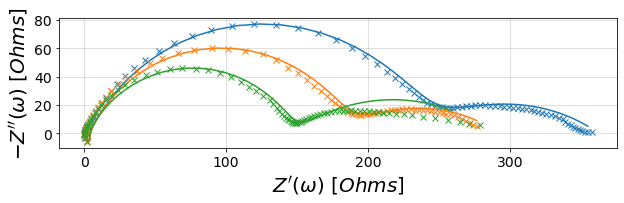

In [2]:
direc = r'G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\\'

all_files = glob.glob(direc + r'*.z')
all_files.sort(key=lambda x: int(x.split('C_')[-1].split("%")[0]))
_, ax1 = plt.subplots(figsize=(10, 7))


fs, Zs, f1s, Z1s = [], [], [], []
models = []
circ = 'L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)'
L0 = 1e-6

for file in all_files:
    print(file)
    f, Z = readZPlot(file)
    fs.append(f)
    Zs.append(Z)
    f1s.append(f[:78])
    Z1 = Z - np.min(Z.real)
    Z1 = Z1 /np.max(Z1.real)
    Z1s.append(Z1)
    
    fit = minimize(IC.series_L, L0, method='Nelder-Mead', args=(f, Z))
    inits = [fit.x[0], 4.1,200, 1e-6, .7, 200, 1e-3, .4]
    model = CustomCircuit(circuit=circ, initial_guess=inits, name=file.split('700C_')[-1])
    model.fit(f, Z)
    models.append(model)
    print(model)
    
pO2s = ['1% O2', '10% O2', '100% O2']

for i, (Z1, Z, f) in enumerate(zip(Z1s, Zs, fs)):
    plot_nyquist(ax1, Z-np.min(Z.real), fmt='x', label=pO2s[i])
    c = ax1.get_lines()[-1].get_color()
    plot_nyquist(ax1, models[i].predict(fs[i]), fmt='-', color=c)
    
plt.savefig('Plots\\NoHole_EIS.png', bbox_inches='tight', dpi=400)

In [3]:
direc = r'G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\\'

all_files = glob.glob(direc + r'*.z')
all_files.sort(key=lambda x: int(x.split('C_')[-1].split("%")[0]))
_, ax1 = plt.subplots(figsize=(10, 7))
_, ax2 = plt.subplots(figsize=(10,7))
_, ax3 = plt.subplots(nrows=2, figsize=(15,12))
_, ax4 = plt.subplots(nrows=2, figsize=(15,12))

fs, Zs, f1s, Z1s = [], [], [], []
models = []
circ = 'L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)'
L0 = 1e-6

for file in all_files:
    print(file)
    f, Z = readZPlot(file)
    fs.append(f)
    Zs.append(Z)
    f1s.append(f[:78])
    Z1 = Z - np.min(Z.real)
    Z1 = Z1 /np.max(Z1.real)
    Z1s.append(Z1)
    
    fit = minimize(IC.series_L, L0, method='Nelder-Mead', args=(f, Z))
    inits = [fit.x[0], 4.1,200, 1e-6, .7, 200, 1e-3, .4]
    model = CustomCircuit(circuit=circ, initial_guess=inits, name=file.split('700C_')[-1])
    model.fit(f, Z)
    models.append(model)
    print(model)
    
pO2s = ['1% O2', '10% O2', '100% O2']

for i, (Z1, Z, f) in enumerate(zip(Z1s, Zs, fs)):
    plot_nyquist(ax1, Z-np.min(Z.real), fmt='x', label=pO2s[i])
    c = ax1.get_lines()[-1].get_color()
    plot_nyquist(ax1, models[i].predict(fs[i]), fmt='-', color=c) #, label=f"Fit Model {i+1}", fmt='-', color=c)
       
    
    plot_nyquist(ax2, Z1, label = pO2s[i])
    plot_bode(ax3, f, Z-np.min(Z.real))
    
    ax4[0].plot(np.log10(f), Z.real)
    ax4[1].plot(np.log10(f), -Z.imag)
    
    ax2.set_xlim(0, .05)
    ax2.set_ylim(0, .05)
#     for axa in ax1:
#         axa.set_xlim(0, )
    print(np.argmin(Z.imag), f[np.argmax(-Z.imag)], Z[np.argmax(-Z.imag)])

    
ax1.
ax1.set_ylim(0,)
ax1.legend(loc='upper right')
# ax1.set_xlim(0, 20)
# ax1.set_ylim(0,10)
ax2.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-3-48156a6d2971>, line 53)

In [42]:
import scipy.signal

In [44]:
for f, Z in zip(fs, Zs):
    peaks = scipy.signal.find_peaks(-Z.imag)
    print(f[peaks[0]],Z[peaks[0]])

[1.0000e+03 5.9948e-01] [123.45-77.189j 286.38-19.872j]
[1.291550e+03 1.668101e-01 7.742637e-02] [ 93.887-60.075j 234.62 -17.027j 243.26 -16.468j]
[1.668101e+03 7.742637e-02 4.641589e-02 5.994842e-03] [ 72.787-45.88j  186.36 -16.084j 192.21 -16.176j 218.92 -14.253j]


In [21]:
fs[0]
Zs[2]

array([  4.3096 +2.4123j ,   3.9599 +1.019j  ,   3.8027 -0.61747j,
         3.9877 -1.6564j ,   4.3643 -2.6347j ,   4.8531 -3.5548j ,
         5.4196 -4.4485j ,   6.3141 -5.2483j ,   7.0027 -6.299j  ,
         7.7617 -7.5085j ,   8.6129 -8.936j  ,   9.5882-10.612j  ,
        10.759 -12.631j  ,  12.185 -15.035j  ,  13.942 -17.9j    ,
        16.147 -21.28j   ,  18.937 -25.197j  ,  22.44  -29.679j  ,
        26.829 -34.683j  ,  32.274 -40.156j  ,  38.903 -45.972j  ,
        46.878 -51.973j  ,  56.314 -57.898j  ,  67.198 -63.647j  ,
        79.507 -68.81j   ,  93.193 -73.043j  , 108.01  -75.949j  ,
       123.45  -77.189j  , 139.06  -76.645j  , 154.16  -74.408j  ,
       168.34  -70.588j  , 181.14  -65.771j  , 192.32  -60.236j  ,
       201.94  -54.498j  , 210.16  -48.905j  , 217.05  -43.633j  ,
       222.86  -38.904j  , 227.94  -34.794j  , 232.32  -31.327j  ,
       236.2   -28.788j  , 239.63  -25.695j  , 242.74  -23.567j  ,
       245.67  -21.777j  , 248.38  -20.513j  , 250.99  -19.578

In [24]:
fs[2]

array([1.000000e+06, 7.742637e+05, 5.994843e+05, 4.641589e+05,
       3.593814e+05, 2.782559e+05, 2.154435e+05, 1.668100e+05,
       1.291550e+05, 1.000000e+05, 7.742637e+04, 5.994843e+04,
       4.641589e+04, 3.593814e+04, 2.782559e+04, 2.154435e+04,
       1.668101e+04, 1.291550e+04, 1.000000e+04, 7.742637e+03,
       5.994842e+03, 4.641589e+03, 3.593814e+03, 2.782559e+03,
       2.154435e+03, 1.668100e+03, 1.291550e+03, 1.000000e+03,
       7.742637e+02, 5.994843e+02, 4.641589e+02, 3.593814e+02,
       2.782560e+02, 2.154435e+02, 1.668100e+02, 1.291550e+02,
       1.000000e+02, 7.742637e+01, 5.994843e+01, 4.641589e+01,
       3.593814e+01, 2.782559e+01, 2.154435e+01, 1.668101e+01,
       1.291550e+01, 1.000000e+01, 7.742640e+00, 5.994840e+00,
       4.641590e+00, 3.593810e+00, 2.782560e+00, 2.154430e+00,
       1.668100e+00, 1.291550e+00, 1.000000e+00, 7.742600e-01,
       5.994800e-01, 4.641600e-01, 3.593800e-01, 2.782600e-01,
       2.154400e-01, 1.668100e-01, 1.291500e-01, 1.0000

In [4]:
for f, Z in zip(fs, Zs):
    print(f[np.argmin(Z.imag)], Z[np.argmin(Z.imag)])

1000.0 (123.45-77.189j)
1291.55 (93.887-60.075j)
1668.101 (72.787-45.88j)


In [5]:
for model in models:
    print(model)


Name: 1%2_EIS-2.z
Circuit string: L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)
Fit: True

Initial guesses:
    L_0 = 1.68e-06 [H]
    R_0 = 4.10e+00 [Ohm]
    R_1 = 2.00e+02 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 7.00e-01 []
    R_2 = 2.00e+02 [Ohm]
  CPE2_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE2_1 = 4.00e-01 []

Fit parameters:
    L_0 = 5.29e-07  (+/- 1.62e-07) [H]
    R_0 = 3.01e+00  (+/- 4.22e-01) [Ohm]
    R_1 = 2.34e+02  (+/- 1.90e+00) [Ohm]
  CPE_1_0 = 7.63e-06  (+/- 3.08e-07) [Ohm^-1 sec^a]
  CPE_1_1 = 7.24e-01  (+/- 4.82e-03) []
    R_2 = 1.26e+02  (+/- 2.67e+00) [Ohm]
  CPE2_0 = 6.91e-03  (+/- 2.63e-04) [Ohm^-1 sec^a]
  CPE2_1 = 3.94e-01  (+/- 1.05e-02) []


Name: 10%_EIS-2.z
Circuit string: L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)
Fit: True

Initial guesses:
    L_0 = 2.02e-06 [H]
    R_0 = 4.10e+00 [Ohm]
    R_1 = 2.00e+02 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 7.00e-01 []
    R_2 = 2.00e+02 [Ohm]
  CPE2_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE2_1 = 4.00e-01 []

Fit parameter

In [4]:
colors = ['k', 'r', 'b', 'c']
markers = [(6, 2, 0), 's', '^', 'o']

G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\NoHoleAl2O3_8h_700C_1%_EIS-2.z
G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\NoHoleAl2O3_8h_700C_10%_EIS-2.z
G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\NoHoleAl2O3_8h_700C_100%_EIS-3.z


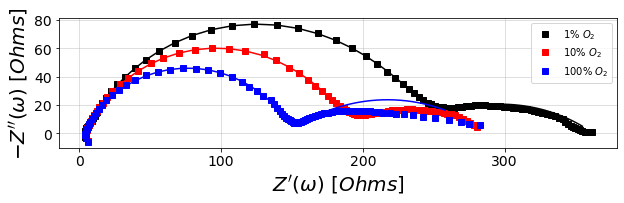

In [12]:
direc = r'G:\\My Drive\\UW Research\\NoHole_EIS\\Tohoku_Al2O3_450nm\\'

all_files = glob.glob(direc + r'*.z')

_, ax1 = plt.subplots(figsize=(10,10))
fs, Zs, f1s, Z1s = [], [], [], []
models = []
circ = 'L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)'
L0 = 1e-6

for file in all_files:
    print(file)
    f, Z = readZPlot(file)
    fs.append(f)
    Zs.append(Z)
    f1s.append(f[:78])
    Z1 = Z / -np.min(Z.imag)
    Z1s.append(Z1)
    
    fit = minimize(IC.series_L, L0, method='Nelder-Mead', args=(f, Z))
    inits = [fit.x[0], 4.1,200, 1e-6, .7, 200, 1e-3, .4]
    model = CustomCircuit(circuit=circ, initial_guess=inits, name=file.split('700C_')[-1])
    model.fit(f, Z)
    models.append(model)

for i, (Z1, Z) in enumerate(zip(Z1s, Zs)):
    gas = all_files[i].split('\\')[-1].split('C_')[-1].split('_')[0]
    plot_nyquist(ax1, models[i].predict(fs[i]), fmt='-',color=colors[i])
    plot_nyquist(ax1, Z, label = f"{gas} $O_2$", fmt='s', color=colors[i])
    
ax1.legend(loc='upper right')
plt.savefig(r'Figures\No_Hole_Sample_EIS.png', bbox_inches='tight', dpi=400)
plt.show()

In [8]:
for m in models:
    print(m)


Name: 1%2_EIS-2.z
Circuit string: L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)
Fit: True

Initial guesses:
    L_0 = 1.68e-06 [H]
    R_0 = 4.10e+00 [Ohm]
    R_1 = 2.00e+02 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 7.00e-01 []
    R_2 = 2.00e+02 [Ohm]
  CPE2_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE2_1 = 4.00e-01 []

Fit parameters:
    L_0 = 5.29e-07  (+/- 1.62e-07) [H]
    R_0 = 3.01e+00  (+/- 4.22e-01) [Ohm]
    R_1 = 2.34e+02  (+/- 1.90e+00) [Ohm]
  CPE_1_0 = 7.63e-06  (+/- 3.08e-07) [Ohm^-1 sec^a]
  CPE_1_1 = 7.24e-01  (+/- 4.82e-03) []
    R_2 = 1.26e+02  (+/- 2.67e+00) [Ohm]
  CPE2_0 = 6.91e-03  (+/- 2.63e-04) [Ohm^-1 sec^a]
  CPE2_1 = 3.94e-01  (+/- 1.05e-02) []


Name: 10%_EIS-2.z
Circuit string: L_0-R_0-p(R_1,CPE_1)-p(R_2,CPE2)
Fit: True

Initial guesses:
    L_0 = 2.02e-06 [H]
    R_0 = 4.10e+00 [Ohm]
    R_1 = 2.00e+02 [Ohm]
  CPE_1_0 = 1.00e-06 [Ohm^-1 sec^a]
  CPE_1_1 = 7.00e-01 []
    R_2 = 2.00e+02 [Ohm]
  CPE2_0 = 1.00e-03 [Ohm^-1 sec^a]
  CPE2_1 = 4.00e-01 []

Fit parameter

### Comparison with Zg Subtracted data

In [9]:
def sub_Zg_parallel(f, Z, tg, Rg_range, num, show_plot=True):
    from impedance.models.circuits.elements import G
    Y = 1/Z

    Zgs, Ygs = [], []
    Z_adjs = []
    
    if len(Rg_range) > 1:
        Rgs = np.logspace(Rg_range[0], Rg_range[1], num=num)
    else:
        Rgs = Rg_range

    for Rg in Rgs:
        Zg = G([Rg, tg], f)
        Yg = 1 / Zg
        Zgs.append(Zg)
        Ygs.append(1/Zg)

    Zgs = np.array(Zgs)
    Ygs = np.array(Ygs)

    if show_plot is False:
        for i, Yg in enumerate(Ygs):
            Y_adj = Y - Yg
            Z_adj = 1 / Y_adj
            Z_adjs.append(Z_adj)

        return np.array(Z_adjs)
 
    else:
        fig, ax = plt.subplots(figsize=(14, 10))
        plot_nyquist(ax, Z, fmt='ks', label='as measured')

        for i, Yg in enumerate(Ygs):
            Y_adj = Y - Yg
            Z_adj = 1 / Y_adj
            Z_adjs.append(Z_adj)

            f_p_idx = np.argmin(np.imag(Z_adj))
            f_p = f[f_p_idx]

            ax.plot(Z_adj.real, -Z_adj.imag, 'r-', label='\"Fit $Z_G$\" subtracted', c=(1, 0, 0))

        ax1.grid(True)
        ax2.grid(True)
        ax.legend()

        return np.array(Z_adjs), ax

### Reading in July 2018 EIS data and subtracting predicted Z_G

In [10]:
Rg_1 = 6169
Rg_1_KM = 4872
tg_1 = 3.26

Rg_10 = 5113
Rg_10_KM = 3898
tg_10 = 1.17

Rg_100 = 4182
Rg_100_KM = 3092
tg_100 = 0.1439

In [11]:
f0, Z0= readVersaStudio('Data\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par')
fs_1, Z_1 = ignoreBelowX(f0, Z0)
R_ohm1 = Z_1.real[0]

fdum, Zs_1 = fs_1[19:], Z_1[19:] - Z_1[19].real
Zsub = sub_Zg_parallel(fdum, Zs_1, tg_1, [Rg_1_KM], num=1, show_plot=False)
Zsub2 = sub_Zg_parallel(fdum, Zs_1, tg_1, [Rg_1], num=1, show_plot=False)
# dum = np.zeros(len(Z_1), dtype=complex)
# dum[:19] = Z_1[:19] 
# dum[19:] = Zsub[0] + Z_1[19].real
# Zsub_1 = dum.copy()
Zsub_1 = Zsub[0]
Zsub_1_MC = Zsub2[0]

f0, Z0= readVersaStudio('Data\LSC_DPB1_FRXAS_700C_10%_EIS_OCV_afterFRXAS.par')
fs_10, Z_10 = ignoreBelowX(f0, Z0)
R_ohm10 = Z_10.real[0]
fdum, Zs_10 = fs_10[20:], Z_10[20:] - Z_10[20].real
Zsub = sub_Zg_parallel(fdum, Zs_10, tg_10, [Rg_10_KM], num=1, show_plot=False)
Zsub2 = sub_Zg_parallel(fdum, Zs_10, tg_10, [Rg_10], num=1, show_plot=False)
# dum = np.zeros(len(Z_10), dtype=complex)
# dum[:20] = Z_10[:20] 
# dum[20:] = Zsub[0] + Z_10[20].real
# Zsub_10 = dum.copy()
Zsub_10 = Zsub[0]
Zsub_10_MC = Zsub2[0]

f0, Z0= readVersaStudio('Data\LSC_DPB1_FRXAS_700C_100%_EIS_OCV_before2.par')
fs_100, Z_100 = ignoreBelowX(f0, Z0)
R_ohm100 = Z_100.real[0]
fdum, Zs_100 = fs_100[19:], Z_100[19:] - Z_100[19].real
Zsub = sub_Zg_parallel(fdum, Zs_100, tg_100, [Rg_100_KM], num=1, show_plot=False)
Zsub2 = sub_Zg_parallel(fdum, Zs_100, tg_100, [Rg_100], num=1, show_plot=False)
# dum = np.zeros(len(Z_100), dtype=complex)
# dum[:19] = Z_100[:19] 
# dum[19:] = Zsub[0] + Z_100[19].real
# Zsub_100 = dum.copy()
Zsub_100 = Zsub[0]
Zsub_100_MC = Zsub2[0]

# Breaking NH EIS into separate variables
fs_NH_1, Zs_NH_1 = fs[0], Zs[0]
fs_NH_10, Zs_NH_10 = fs[1], Zs[1]
fs_NH_100, Zs_NH_100 = fs[2], Zs[2]

In [15]:
fs_1[np.argmin(Z_1.imag)]

0.4641589

In [16]:
fs_10[np.argmin(Z_10.imag)]

1.29155

In [17]:
fs_100[np.argmin(Z_100.imag)]

4.641589

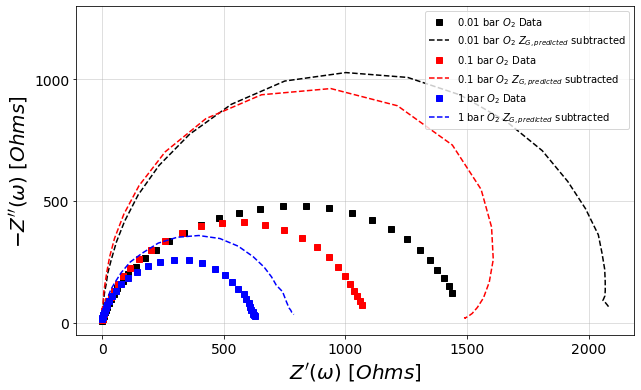

In [11]:
# Arranged by order of magnitude so legend is easier to follow

_, ax =plt.subplots(figsize=(10,10))
colors = ['k', 'r', 'b']
labels = ['0.01', '0.1', '1']
for i, (Z, Z_sub) in enumerate(zip([Zs_1, Zs_10, Zs_100], [Zsub_1, Zsub_10, Zsub_100])):
    plot_nyquist(ax, Z, c=colors[i], fmt='s', label=labels[i]+' bar $O_2$ Data')
    plot_nyquist(ax, Z_sub, c=colors[i], fmt='--', label=labels[i]+' bar $O_2$ $Z_{G, predicted}$ subtracted')

ax.set_ylim(-50, 1300)
ax.legend()
# plt.savefig('Figures\Z_G_Predict_Subtracted.png', bbox_inches='tight', dpi=300)
plt.show()

## Fitting Models to Z_G Sub

[2.08956225e+03 6.34296417e-05 9.88532362e-01]
[1.60268484e+03 3.87676699e-05 1.00000000e+00]
[7.78845453e+02 5.21682537e-05 9.42298125e-01]


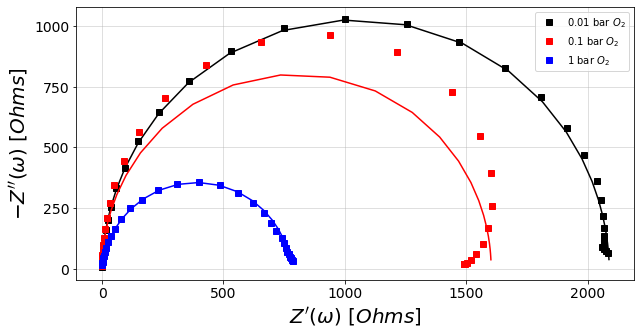

In [412]:
# Zg subtraction with Mixed Bulk Thermo model
_, ax = plt.subplots(figsize=(10,10))
models = []
colors = ['k', 'r', 'b']
labels = ['0.01', '0.1', '1']
for i, (f, Z) in enumerate(zip([fs_1[19:], fs_10[20:], fs_100[19:]], [Zsub_1, Zsub_10, Zsub_100])):
    inits = [np.real(Z[-1] - Z[0]), 5.88275e-4, .7]
    Z_mask = CustomCircuit(circuit='p(R1,CPE1)', initial_guess=inits)
    Z_mask.fit(f, Z - Z[0].real)
    print(Z_mask.parameters_)
    models.append(Z_mask)
    plot_nyquist(ax, Z, c=colors[i], fmt='s', label=labels[i]+' bar $O_2$')
    plot_nyquist(ax, Z_mask.predict(f), c=colors[i], fmt='-')

ax.legend()
# plt.savefig('Figures\Z_G_Predict_Subtracted_FIts.png', bbox_inches='tight', dpi=300)
plt.show()

[1.91527917e+03 1.08133669e-04 8.78613618e-01]
[1.39008647e+03 5.04808141e-05 1.00000000e+00]
[7.33136791e+02 6.09537284e-05 9.21685312e-01]


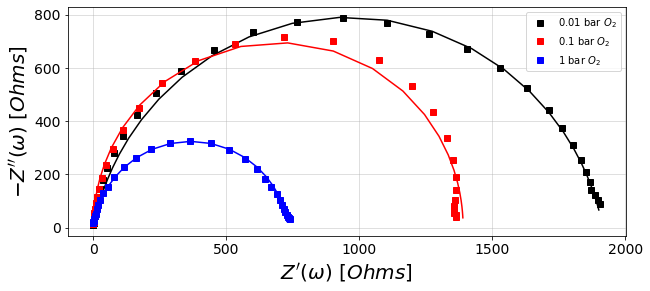

In [12]:
# Zg subtraction with Mizusaki with Constant Capacitance model
_, ax = plt.subplots(figsize=(10,10))
models = []
colors = ['k', 'r', 'b']
labels = ['0.01', '0.1', '1']
for i, (f, Z) in enumerate(zip([fs_1[19:], fs_10[20:], fs_100[19:]], [Zsub_1_MC, Zsub_10_MC, Zsub_100_MC])):
    inits = [np.real(Z[-1] - Z[0]), 5.88275e-4, .7]
    Z_mask = CustomCircuit(circuit='p(R1,CPE1)', initial_guess=inits)
    Z_mask.fit(f, Z - Z[0].real)
    print(Z_mask.parameters_)
    models.append(Z_mask)
    plot_nyquist(ax, Z, c=colors[i], fmt='s', label=labels[i]+' bar $O_2$')
    plot_nyquist(ax, Z_mask.predict(f), c=colors[i], fmt='-')

ax.legend()
# plt.savefig('Figures\Z_G_Predict_Subtracted_FIts.png', bbox_inches='tight', dpi=300)
plt.show()

In [413]:
# Some geometry calculations
A_NH = np.pi * (0.65**2)
L_NH = 450e-7
A_gate = 1.04345 * 4.478e-4
A_patt = .35**2 - A_gate #0.110 - A_gate  #0.117
L_LSC = 600e-7
L_patt = 280e-7

# Correction factor for patterned geometry to NH geometry
geom_corr = A_NH/A_patt*L_patt/L_NH

In [414]:
C_1_pred = 1915**(1/0.88-1)*1.08e-4
C_1_fit = 1790**(1/0.81-1)*1.59e-4
C_10_pred = 1390**(1/1-1)*5.048e-5
C_100_pred = 733**(1/.922-1)*6.096e-5

In [415]:
print('Gate normalization. Fit: ', C_1_fit/(A_gate*L_LSC), 'Predicted: ', C_1_pred/(A_gate*L_LSC))
print('NH normalization. Fit: ', C_1_fit/(A_NH*L_LSC), 'Predicted: ', C_1_pred/(A_NH*L_LSC))
print('Patterned norm. Fit:', C_1_fit/(A_patt*L_LSC), 'Predicted:', C_1_pred/(A_patt*L_LSC))

Gate normalization. Fit:  32862.83677953663 Predicted:  10796.556012948498
NH normalization. Fit:  11.568690340591772 Predicted:  3.800706983897098
Patterned norm. Fit: 125.83006149518359 Predicted: 41.33944114926341


In [416]:
print('Gate normalization. Predicted: ', C_10_pred/(A_gate*L_LSC))
print('NH normalization. Predicted: ', C_10_pred/(A_NH*L_LSC))
print('Patterned norm. Predicted:', C_10_pred/(A_patt*L_LSC))

Gate normalization. Predicted:  1800.57975671956
NH normalization. Predicted:  0.6338573197064202
Patterned norm. Predicted: 6.894324523319485


In [417]:
print('Gate normalization. Predicted: ', C_100_pred/(A_gate*L_LSC))
print('NH normalization. Predicted: ', C_100_pred/(A_NH*L_LSC))
print('Patterned norm. Predicted:', C_100_pred/(A_patt*L_LSC))

Gate normalization. Predicted:  3799.461451229246
NH normalization. Predicted:  1.3375227855453062
Patterned norm. Predicted: 14.547936663655745


### Defining functions to calculate volume specific capacitance and area specific resistance for predictions down below

In [270]:
def C_chem_gen(Ao, xvo):
    F = 96485
    R = 8.314
    T = 973
    co = 3 / 35.914
    
    return 4 * F**2 * co * xvo / (Ao * R * T)

def C_chem_mizu(delta):
    d = delta
    F = 96485
    R = 8.314
    T = 973
    Vm = 35.914
    a = 299000
    
    return 4 * F**2 / (Vm * (a + 3 * R * T / (d * (3 - d))))

# Ignore this one for now
def C_chem_mix(delta):
    d = delta
    F = 96485
    R = 8.314
    T = 973
    Vm = 35.914
    
    cfit = 228000
    
    return 4 * F**2 / (Vm * (cfit + R * T / d))

def ASR(Ao, xvo, tg):
    F = 96485
    R = 8.314
    T = 973
    co = 3 / 35.914
    L = 600e-7
    return R * T / (4 * F**2) * Ao * tg / (co * xvo * L) 

In [157]:
MC_delta = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mizusaki+Cconst_Nonstoich.csv', delimiter=',')
MC_Ao = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mizusaki+Cconst_Thermo.csv', delimiter=',')
MB_delta = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mixed_Bulk_Nonstoich.csv', delimiter=',')
MB_Ao = np.genfromtxt(r'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Discussions\\Mixed_Bulk_Thermo.csv', delimiter=',')

MC_delta = MC_delta[np.argsort(MC_delta[:,0])]
MC_Ao = MC_Ao[np.argsort(MC_Ao[:,0])]
MB_delta = MB_delta[np.argsort(MB_delta[:,0])]
MB_Ao = MB_Ao[np.argsort(MB_Ao[:,0])]

In [158]:
# Constructing lists of Po2, Ao, delta for both models using data arrays and 
# interpolating for delta if Po2's don't match exactly
MB_vals, MC_vals = [], []
for ao in MB_Ao:
    try:
        delta = MB_delta[np.argwhere(np.isclose(MB_delta[:,0], ao[0]))[0,0]][-1]
#         print(f'Match Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MB_vals.append([ao[0], ao[1], delta])
    except IndexError:
        delta = np.interp(ao[0], MB_delta[:,0], MB_delta[:,1])
#         print(f'Interp Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MB_vals.append([ao[0], ao[1], delta])

for ao in MC_Ao:
    try:
        delta = MC_delta[np.argwhere(np.isclose(MC_delta[:,0], ao[0]))[0,0]][-1]
#         print(f'Match Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MC_vals.append([ao[0], ao[1], delta])
    except IndexError:
        delta = np.interp(ao[0], MC_delta[:,0], MC_delta[:,1])
#         print(f'Interp Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MC_vals.append([ao[0], ao[1], delta])

MB_vals = np.array(MB_vals)
MC_vals = np.array(MC_vals)

### Use Values interpolated for Ao since it's a larger data set

In [159]:
# Constructing lists of Po2, Ao, delta for both models using data arrays and 
# interpolating for Ao if Po2's don't match exactly
MB_vals, MC_vals = [], []
for delta in MB_delta:
    try:
        ao = MB_Ao[np.argwhere(np.isclose(MB_Ao[:,0], delta[0]))[0,0]][-1]
#         print(f'Match Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MB_vals.append([delta[0], ao, delta[1]])
    except IndexError:
        ao = np.interp(delta[0], MB_Ao[:,0], MB_Ao[:,1])
#         print(f'Interp Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MB_vals.append([delta[0], ao, delta[1]])

for delta in MC_delta:
    try:
        ao = MC_Ao[np.argwhere(np.isclose(MC_Ao[:,0], delta[0]))[0,0]][-1]
#         print(f'Match Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MC_vals.append([delta[0], ao, delta[1]])
    except IndexError:
        ao = np.interp(delta[0], MC_Ao[:,0], MC_Ao[:,1])
#         print(f'Interp Po2: {ao[0]:.2f}, Ao: {ao[1]:.3f}, delta: {delta:.4f}')
        MC_vals.append([delta[0], ao, delta[1]])

MB_vals = np.array(MB_vals)
MC_vals = np.array(MC_vals)

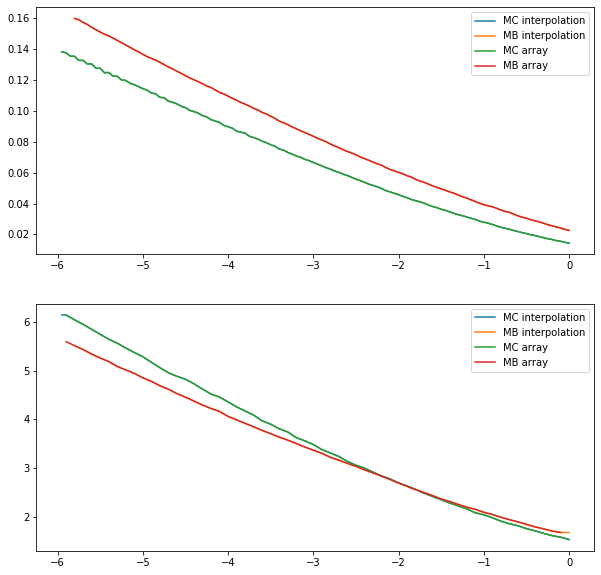

In [160]:
# Checking to make sure interpolation isn't too wonky
_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,10))

ax1.plot(MC_delta[:,0], MC_delta[:,1], label='MC interpolation')
ax1.plot(MB_delta[:,0], MB_delta[:,1], label='MB interpolation')
ax1.plot(MC_vals[:,0], MC_vals[:,2], label='MC array')
ax1.plot(MB_vals[:,0], MB_vals[:,2], label='MB array')
ax1.legend()

ax2.plot(MC_vals[:,0], MC_vals[:,1], label='MC interpolation')
ax2.plot(MB_vals[:,0], MB_vals[:,1], label='MB interpolation')
ax2.plot(MC_Ao[:,0], MC_Ao[:,1], label='MC array')
ax2.plot(MB_Ao[:,0], MB_Ao[:,1], label='MB array')
ax2.legend()

plt.show()

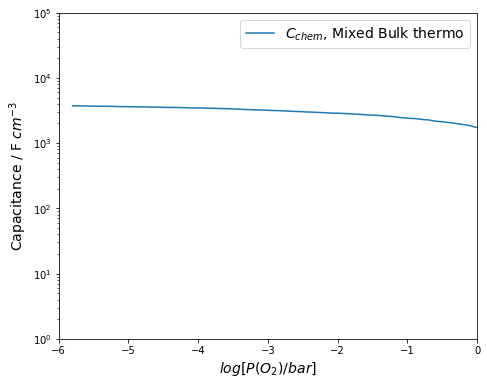

In [209]:
_, ax =plt.subplots(figsize=(7.5,6))

ax.semilogy(MB_vals[:, 0], C_chem_gen(MB_vals[:,1], MB_vals[:,2]/3), label='$C_{chem}$, Mixed Bulk thermo')
# ax.semilogy(MC_vals[:, 0], C_chem_gen(MC_vals[:,1], MC_vals[:,2]/3), label='C_chem_general, Mizu thermo')
# ax.semilogy(MC_vals[:, 0], C_chem_mizu(MC_vals[:,2]), label='C_chem_mizu, Mizu thermo')
# ax.semilogy(MB_vals[:, 0], C_chem_mizu(MB_vals[:,2]), label='C_chem_mizu, Mixed Bulk thermo')

ax.set_ylim(1e0, 1e5)
ax.set_xlim(-6, 0)
ax.set_ylabel('Capacitance / F $cm^{-3}$',fontsize=14)
ax.set_xlabel('$log[P(O_2)/bar]$',fontsize=14)
ax.legend(fontsize=14)
plt.savefig(r'Figures\\ChemicalCapacitance.png',bbox_inches='tight', dpi=300)
plt.show()

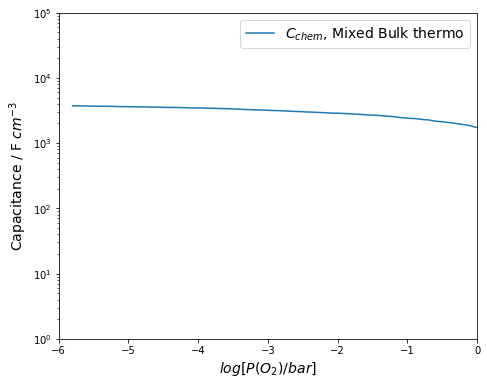

In [209]:
_, ax =plt.subplots(figsize=(7.5,6))

ax.semilogy(MB_vals[:, 0], C_chem_gen(MB_vals[:,1], MB_vals[:,2]/3), label='$C_{chem}$, Mixed Bulk thermo')
# ax.semilogy(MC_vals[:, 0], C_chem_gen(MC_vals[:,1], MC_vals[:,2]/3), label='C_chem_general, Mizu thermo')
# ax.semilogy(MC_vals[:, 0], C_chem_mizu(MC_vals[:,2]), label='C_chem_mizu, Mizu thermo')
# ax.semilogy(MB_vals[:, 0], C_chem_mizu(MB_vals[:,2]), label='C_chem_mizu, Mixed Bulk thermo')

ax.set_ylim(1e0, 1e5)
ax.set_xlim(-6, 0)
ax.set_ylabel('Capacitance / F $cm^{-3}$',fontsize=14)
ax.set_xlabel('$log[P(O_2)/bar]$',fontsize=14)
ax.legend(fontsize=14)
plt.savefig(r'Figures\\ChemicalCapacitance.png',bbox_inches='tight', dpi=300)
plt.show()

### Use Mixed Bulk Thermo with C_chem_gen and ASR functions to predict extensive values at each Po2

In [418]:
epi = 11
rho_1 = 6.90e6  #8.16e6
rho_10 = 5.31e6 #6.27e6
rho_100 = 4.28e6 #3.05e6

A_patt = 0.110 - A_gate # .35**2 - A_gate

In [447]:
vals1 = MB_vals[np.isclose(MB_vals[:,0], -2)][0]
Ao1 = vals1[1] #2.689 #
xvo1 = vals1[2]/3 #0.1989 #
print(Ao1, xvo1)

C_mask1 = epi*8.854e-12/100 * A_patt / L_patt
R_mask1 = rho_1 * L_patt / A_patt
t_mask1 = R_mask1 * C_mask1
print('Mask: ', C_mask1, R_mask1, t_mask1)
C_film1 = C_chem_gen(Ao1, xvo1) * A_patt * L_LSC
R_film1 = ASR(Ao1, xvo1, tg_1) / A_patt
t_film1 = R_film1 * C_film1
print('Film: ', C_film1, R_film1, t_film1)
C_gate1 = C_chem_gen(Ao1, xvo1) * A_gate * L_LSC
R_gate1 = ASR(Ao1, xvo1, tg_1) / A_gate
t_gate1 = R_gate1 * C_gate1
print('Gate: ', C_gate1, R_gate1, t_gate1)

2.689352176212296 0.02008144378178679
Mask:  3.809939993038378e-09 1763.8561269414474 6.720185999999999e-06
Film:  0.018869338707107434 172.76705085441438 3.26
Gate:  8.049491548643015e-05 40499.45242255172 3.26


In [448]:
vals10 = MB_vals[np.isclose(MB_vals[:,0], -1)][0]
Ao10 = vals10[1] #2.088 #
xvo10 = vals10[2]/3 #0.01295 #
print(Ao10, xvo10)

C_mask10 = epi*8.854e-12/100 * A_patt / L_patt
R_mask10 = rho_10 * L_patt / A_patt
t_mask10 = R_mask10 * C_mask10
print('Mask: ', C_mask10, R_mask10, t_mask10)
C_film10 = C_chem_gen(Ao10, xvo10) * A_patt * L_LSC
R_film10 = ASR(Ao10, xvo10, tg_10) / A_patt
t_film10 = R_film10 * C_film10
print('Film: ', C_film10, R_film10, t_film10)
C_gate10 = C_chem_gen(Ao10, xvo10) * A_gate * L_LSC
R_gate10 = ASR(Ao10, xvo10, tg_10) / A_gate
t_gate10 = R_gate10 * C_gate10
print('Gate: ', C_gate10, R_gate10, t_gate10)

2.088116233657357 0.013103655781516352
Mask:  3.809939993038378e-09 1357.4023237766794 5.1716214e-06
Film:  0.015857956804199855 73.77999665695486 1.17
Gate:  6.764862895066474e-05 17295.250741197804 1.1699999999999997


In [449]:
vals100 = MB_vals[np.isclose(MB_vals[:,0], 0)][0]
Ao100 = vals100[1] #1.644 #
xvo100 = vals100[2]/3 #0.007246 #
print(Ao100, xvo100)

C_mask100 = epi*8.854e-12/100 * A_patt / L_patt
R_mask100 = rho_100 * L_patt / A_patt
t_mask100 = R_mask100 * C_mask100
print(f'Mask: Capacitance ', C_mask100, R_mask100, t_mask100)
C_film100 = C_chem_gen(Ao100, xvo100) * A_patt * L_LSC
R_film100 = ASR(Ao100, xvo100, tg_100) / A_patt
t_film100 = R_film100 * C_film100
print('Film: ', C_film100, R_film100, t_film100)
C_gate100 = C_chem_gen(Ao100, xvo100) * A_gate * L_LSC
R_gate100 = ASR(Ao100, xvo100, tg_100) / A_gate
t_gate100 = R_gate100 * C_gate100
print('Gate: ', C_gate100, R_gate100, t_gate100)

1.6731977959523796 0.00753284315341977
Mask:  3.809939993038378e-09 1094.1020613491878 4.1684631999999995e-06
Film:  0.011376824667953112 12.648520496702893 0.14390000000000003
Gate:  4.85325190440234e-05 2965.0222744356142 0.14390000000000003


### Predict several scenarios of equivalent circuits to compare with as measured, Z_G subtracted, and no hole data

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
1877.9593009306332 1.29155


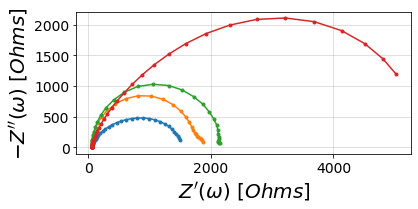

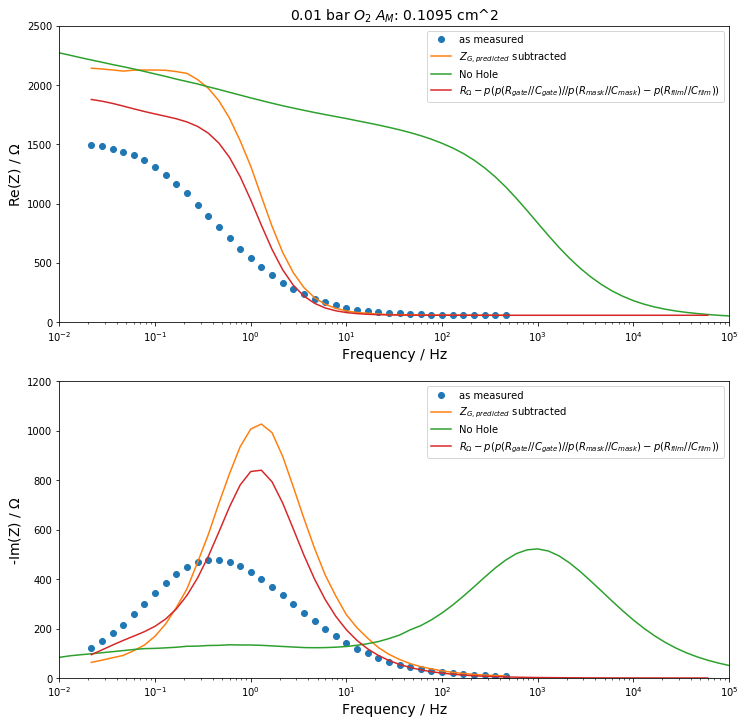

In [450]:
# 0.01 Bar O2 Plots
vals = [R_ohm1, Rg_1_KM, tg_1]
circ_Zg_1 = CustomCircuit(circuit='R0-G1', initial_guess=vals)
Z_circ_Zg_1 = circ_Zg_1.predict(fs_1)

vals = [R_ohm1, R_mask1, C_mask1, R_film1, C_film1]
circ_MF_1 = CustomCircuit(circuit='R0-p(R1,C1)-p(R2,C2)', initial_guess=vals)
Z_circ_MF_1 = circ_MF_1.predict(fs_1)

vals = [R_ohm1, R_gate1, C_gate1]
circ_G_1 = CustomCircuit(circuit='R0-p(R3,C3)', initial_guess=vals)
Z_circ_G_1 = circ_G_1.predict(fs_1)

vals = [R_ohm1, R_mask1, C_mask1, R_film1, C_film1, R_gate1, C_gate1]
circ_MF_G_1 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R2,C2))', initial_guess=vals)
Z_circ_MF_G_1 = circ_MF_G_1.predict(fs_1)

vals = [R_ohm1, R_mask1, C_mask1, R_film1, C_film1, R_gate1, C_gate1, Rg_1, tg_1]
circ_Zg_G_MF_1 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_1 = circ_Zg_G_MF_1.predict(fs_1)

vals = [R_ohm1, R_gate1, C_gate1, Rg_1, tg_1]
circ_Zg_G_1 = CustomCircuit(circuit='R0-p(p(R1,C1),G1)', initial_guess=vals)
Z_circ_Zg_G_1 = circ_Zg_G_1.predict(fs_1)

_, ax = plt.subplots()
plot_nyquist(ax, Zs_1+R_ohm1)
# plot_nyquist(ax, Z_circ_MF)
# plot_nyquist(ax, Z_circ_G)
plot_nyquist(ax, Z_circ_MF_G_1)
# plot_nyquist(ax, Z_circ_Zg_G_MF)
plot_nyquist(ax, Zsub_1+R_ohm1)
plot_nyquist(ax, Z_circ_Zg_G_1)
# plt.savefig(r'Figures\\1%O2_ParallelPath_Comparison_A_full_Nyquist.png', bbox_inches='tight', dpi=300)

_, axes = plt.subplots(nrows=2, figsize=(12,12))
axes[0].semilogx(fs_1[19:], np.real(Zs_1+R_ohm1), 'o', label=r'as measured')
axes[0].semilogx(fs_1[19:], np.real(Zsub_1+R_ohm1), label='$Z_{G, predicted}$ subtracted')
axes[0].semilogx(fs_NH_1, Zs_NH_1.real*geom_corr, label='No Hole')
axes[0].semilogx(fs_1, Z_circ_MF_G_1.real, label=r'$R_{\Omega}-p(p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
# axes[0].semilogx(fs_1, Z_circ_Zg_G_1.real*0.5, label=r'0.5 X $R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate}$))')
# axes[0].semilogx(fs_1, Z_circ_MF_1.real, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# axes[0].semilogx(fs_1, Z_circ_G_1.real*1e-2, label=r'0.01 X $R_{\Omega}-p(R_{gate}//C_{gate}$)')
# axes[0].semilogx(fs_1, Z_circ_Zg_1.real, label=r'$R_{\Omega}-Z_G$')

axes[0].set_title('0.01 bar $O_2$ $A_{M}$: '+ f'{A_patt:.4f} cm^2', fontsize=14)
axes[0].set_xlim(1e-2,1e5)
axes[0].set_ylim(0, 2.5e3)
axes[0].set_xlabel('Frequency / Hz', fontsize=14)
axes[0].set_ylabel('Re(Z) / $\Omega$', fontsize=14)
axes[0].legend(loc='upper right')

axes[1].semilogx(fs_1[19:], -np.imag(Zs_1+R_ohm1), 'o', label=r'as measured')
axes[1].semilogx(fs_1[19:], -np.imag(Zsub_1+R_ohm1), label='$Z_{G,predicted}$ subtracted')
axes[1].semilogx(fs_NH_1, -Zs_NH_1.imag*geom_corr, label='No Hole')
axes[1].semilogx(fs_1, -Z_circ_MF_G_1.imag, label=r'$R_{\Omega}-p(p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
# axes[1].semilogx(fs_1, -Z_circ_Zg_G_1.imag*0.5, label=r'0.5 X $R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate}$))')
# axes[1].semilogx(fs_1, -Z_circ_MF_1.imag, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# axes[1].semilogx(fs_1, -Z_circ_G_1.imag*1e-2, label=r'0.01 X $R_{\Omega}-p(R_{gate}//C_{gate}$)')
# axes[1].semilogx(fs_1, -Z_circ_Zg_1.imag, label=r'$R_{\Omega}-Z_G$')

axes[1].set_xlim(1e-2,1e5)
axes[1].set_ylim(0, 1200)
axes[1].legend()
axes[1].set_xlabel('Frequency / Hz', fontsize=14)
axes[1].set_ylabel('-Im(Z) / $\Omega$', fontsize=14)
# plt.savefig(r'Figures\\1%O2_All_Comparison_A_full.png', bbox_inches='tight', dpi=300)
# plt.savefig(r'Figures\\1%O2_ParallelPath_Comparison_A_full.png', bbox_inches='tight', dpi=300)
print(np.max(Z_circ_MF_G_1.real), fs_1[np.argmin(Z_circ_MF_G_1.imag)])
plt.show()

In [426]:
vals = [R_ohm1, Rg_1_KM, tg_1]
circ_Zg_1 = CustomCircuit(circuit='R0-G1', initial_guess=vals)
Z_circ_Zg_1 = circ_Zg_1.predict(fs_1)

vals = [R_ohm10, Rg_10_KM, tg_10]
circ_Zg_10 = CustomCircuit(circuit='R0-G1', initial_guess=vals)
Z_circ_Zg_10 = circ_Zg_10.predict(fs_10)

vals = [R_ohm100, Rg_100_KM, tg_100]
circ_Zg_100 = CustomCircuit(circuit='R0-G1', initial_guess=vals)
Z_circ_Zg_100 = circ_Zg_100.predict(fs_100)

print(0.25118/(fs_1[np.argmin(Z_circ_Zg_1.imag)]))
print(0.25118/(fs_10[np.argmin(Z_circ_Zg_10.imag)]))
print(0.25118/(fs_100[np.argmin(Z_circ_Zg_100.imag)]))

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
3.2441143760194366
1.165874115487355
0.11658741154873553


Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
1365.0114325188993 1.668101


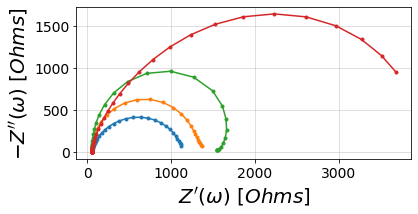

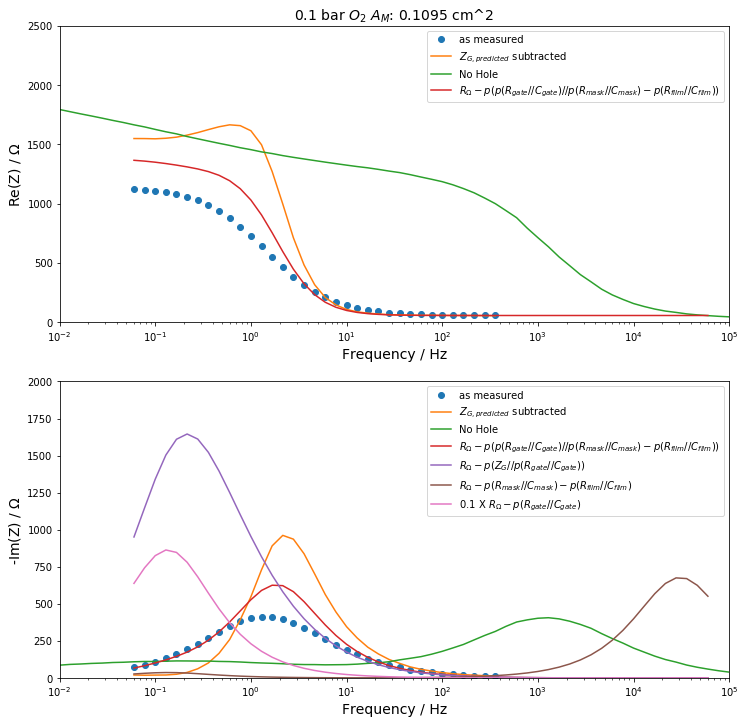

In [451]:
# 0.1 Bar O2 Plots

vals = [R_ohm10, R_mask10, C_mask10, R_film10, C_film10]
circ_MF_10 = CustomCircuit(circuit='R0-p(R1,C1)-p(R2,C2)', initial_guess=vals)
Z_circ_MF_10 = circ_MF_10.predict(fs_10)

vals = [R_ohm10, R_gate10, C_gate10]
circ_G_10 = CustomCircuit(circuit='R0-p(R3,C3)', initial_guess=vals)
Z_circ_G_10 = circ_G_10.predict(fs_10)

vals = [R_ohm10, R_mask10, C_mask10, R_film10, C_film10, R_gate10, C_gate10]
circ_MF_G_10 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R2,C2))', initial_guess=vals)
Z_circ_MF_G_10 = circ_MF_G_10.predict(fs_10)

vals = [R_ohm10, R_mask10, C_mask10, R_film10, C_film10, R_gate10, C_gate10, Rg_10, tg_10]
circ_Zg_G_MF_10 = CustomCircuit(circuit='R0-p(p(R10,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_10 = circ_Zg_G_MF_10.predict(fs_10)

vals = [R_ohm10, R_gate10, C_gate10, Rg_10, tg_10]
circ_Zg_G_10 = CustomCircuit(circuit='R0-p(p(R1,C1),G1)', initial_guess=vals)
Z_circ_Zg_G_10 = circ_Zg_G_10.predict(fs_10)

_, ax = plt.subplots()
plot_nyquist(ax, Zs_10+R_ohm10)
# plot_nyquist(ax, Z_circ_MF)
# plot_nyquist(ax, Z_circ_G)
plot_nyquist(ax, Z_circ_MF_G_10)
# plot_nyquist(ax, Z_circ_Zg_G_MF)
plot_nyquist(ax, Zsub_10+R_ohm10)
plot_nyquist(ax, Z_circ_Zg_G_10)
# plt.savefig(r'Figures\\10%O2_ParallelPath_Comparison_A_full_Nyquist.png', bbox_inches='tight', dpi=300)

_, axes = plt.subplots(nrows=2, figsize=(12,12))
axes[0].semilogx(fs_10[20:], np.real(Zs_10+R_ohm10), 'o', label=r'as measured')
axes[0].semilogx(fs_10[20:], np.real(Zsub_10+R_ohm10), label='$Z_{G, predicted}$ subtracted')
axes[0].semilogx(fs_NH_10, Zs_NH_10.real*geom_corr, label='No Hole')
axes[0].semilogx(fs_10, Z_circ_MF_G_10.real, label=r'$R_{\Omega}-p(p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
# axes[0].semilogx(fs_10, Z_circ_Zg_G_10.real, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate}$))')
# axes[0].semilogx(fs_10, Z_circ_MF_10.real, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# axes[0].semilogx(fs_10, Z_circ_G_10.real*1e-1, label=r'0.1 X $R_{\Omega}-p(R_{gate}//C_{gate}$)')

axes[0].set_title('0.1 bar $O_2$ $A_{M}$: '+ f'{A_patt:.4f} cm^2', fontsize=14)
axes[0].set_xlim(1e-2,1e5)
axes[0].set_ylim(0, 2.5e3)
axes[0].set_xlabel('Frequency / Hz', fontsize=14)
axes[0].set_ylabel('Re(Z) / $\Omega$', fontsize=14)
axes[0].legend(loc='upper right')

axes[1].semilogx(fs_10[20:], -np.imag(Zs_10+R_ohm10), 'o', label=r'as measured')
axes[1].semilogx(fs_10[20:], -np.imag(Zsub_10+R_ohm10), label='$Z_{G,predicted}$ subtracted')
axes[1].semilogx(fs_NH_10, -Zs_NH_10.imag*geom_corr, label='No Hole')
axes[1].semilogx(fs_10, -Z_circ_MF_G_10.imag, label=r'$R_{\Omega}-p(p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
axes[1].semilogx(fs_10, -Z_circ_Zg_G_10.imag, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate}$))')
axes[1].semilogx(fs_10, -Z_circ_MF_10.imag, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
axes[1].semilogx(fs_10, -Z_circ_G_10.imag*1e-1, label=r'0.1 X $R_{\Omega}-p(R_{gate}//C_{gate}$)')

axes[1].set_xlim(1e-2,1e5)
axes[1].set_ylim(0, 2000)
axes[1].legend()
axes[1].set_xlabel('Frequency / Hz', fontsize=14)
axes[1].set_ylabel('-Im(Z) / $\Omega$', fontsize=14)
# plt.savefig(r'Figures\\10%O2_All_Comparison_A_est.png', bbox_inches='tight', dpi=300)
# plt.savefig(r'Figures\\10%O2_ParallelPath_Comparison_A_est.png', bbox_inches='tight', dpi=300)
print(np.max(Z_circ_MF_G_10.real), fs_10[np.argmin(Z_circ_MF_G_10.imag)])
plt.show()

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
882.5427424296341 4.641589


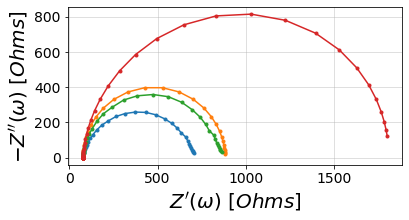

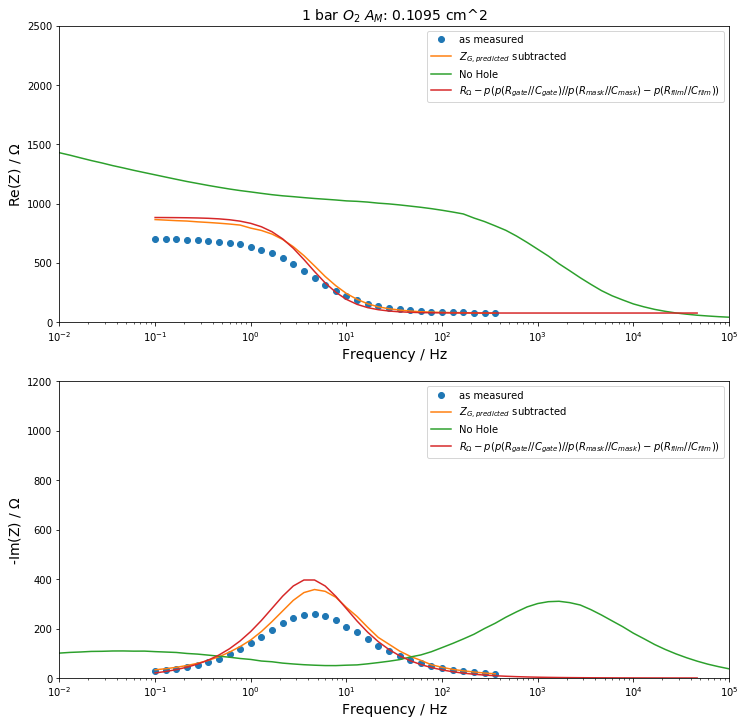

In [452]:
# 1 Bar O2 Plots

vals = [R_ohm100, R_mask100, C_mask100, R_film100, C_film100]
circ_MF_100 = CustomCircuit(circuit='R0-p(R1,C1)-p(R2,C2)', initial_guess=vals)
Z_circ_MF_100 = circ_MF_100.predict(fs_100)

vals = [R_ohm100, R_gate100, C_gate100]
circ_G_100 = CustomCircuit(circuit='R0-p(R3,C3)', initial_guess=vals)
Z_circ_G_100 = circ_G_100.predict(fs_100)

vals = [R_ohm100, R_mask100, C_mask100, R_film100, C_film100, R_gate100, C_gate100]
circ_MF_G_100 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R2,C2))', initial_guess=vals)
Z_circ_MF_G_100 = circ_MF_G_100.predict(fs_100)

vals = [R_ohm100, R_mask100, C_mask100, R_film100, C_film100, R_gate100, C_gate100, Rg_100, tg_100]
circ_Zg_G_MF_100 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_100 = circ_Zg_G_MF_100.predict(fs_100)

vals = [R_ohm100, R_gate100, C_gate100, Rg_100, tg_100]
circ_Zg_G_100 = CustomCircuit(circuit='R0-p(p(R1,C1),G1)', initial_guess=vals)
Z_circ_Zg_G_100 = circ_Zg_G_100.predict(fs_100)

_, ax = plt.subplots()
plot_nyquist(ax, Zs_100+R_ohm100)
# plot_nyquist(ax, Z_circ_MF)
# plot_nyquist(ax, Z_circ_G)
plot_nyquist(ax, Z_circ_MF_G_100)
# plot_nyquist(ax, Z_circ_Zg_G_MF)
plot_nyquist(ax, Zsub_100+R_ohm100)
plot_nyquist(ax, Z_circ_Zg_G_100)
plt.savefig(r'Figures\\100%O2_ParallelPath_Comparison_A_full_Nyquist.png', bbox_inches='tight', dpi=300)

_, axes = plt.subplots(nrows=2, figsize=(12,12))
axes[0].semilogx(fs_100[19:], np.real(Zs_100+R_ohm100), 'o', label=r'as measured')
axes[0].semilogx(fs_100[19:], np.real(Zsub_100+R_ohm100), label='$Z_{G, predicted}$ subtracted')
axes[0].semilogx(fs_NH_100, Zs_NH_100.real*geom_corr, label='No Hole')
axes[0].semilogx(fs_100, Z_circ_MF_G_100.real, label=r'$R_{\Omega}-p(p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
# axes[0].semilogx(fs_100, Z_circ_Zg_G_100.real, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate}$))')
# axes[0].semilogx(fs_100, Z_circ_MF_100.real, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# axes[0].semilogx(fs_100, Z_circ_G_100.real*5e-1, label=r'0.5 X $R_{\Omega}-p(R_{gate}//C_{gate}$)')

axes[0].set_title('1 bar $O_2$ $A_{M}$: '+ f'{A_patt:.4f} cm^2', fontsize=14)
axes[0].set_xlim(1e-2,1e5)
axes[0].set_ylim(0, 2.5e3)
axes[0].set_xlabel('Frequency / Hz', fontsize=14)
axes[0].set_ylabel('Re(Z) / $\Omega$', fontsize=14)
axes[0].legend(loc='upper right')

axes[1].semilogx(fs_100[19:], -np.imag(Zs_100+R_ohm100), 'o', label=r'as measured')
axes[1].semilogx(fs_100[19:], -np.imag(Zsub_100+R_ohm100), label='$Z_{G,predicted}$ subtracted')
axes[1].semilogx(fs_NH_100, -Zs_NH_100.imag*geom_corr, label='No Hole')
axes[1].semilogx(fs_100, -Z_circ_MF_G_100.imag, label=r'$R_{\Omega}-p(p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
# axes[1].semilogx(fs_100, -Z_circ_Zg_G_100.imag, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate}$))')
# axes[1].semilogx(fs_100, -Z_circ_MF_100.imag, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# axes[1].semilogx(fs_100, -Z_circ_G_100.imag*5e-1, label=r'0.5 X $R_{\Omega}-p(R_{gate}//C_{gate}$)')

axes[1].set_xlim(1e-2,1e5)
axes[1].set_ylim(0, 1200)
axes[1].legend()
axes[1].set_xlabel('Frequency / Hz', fontsize=14)
axes[1].set_ylabel('-Im(Z) / $\Omega$', fontsize=14)
# plt.savefig(r'Figures\\100%O2_All_Comparison_A_full.png', bbox_inches='tight', dpi=300)
# plt.savefig(r'Figures\\100%O2_ParallelPath_Comparison_A_est.png', bbox_inches='tight', dpi=300)
print(np.max(Z_circ_MF_G_100.real), fs_100[np.argmin(Z_circ_MF_G_100.imag)])
plt.show()

In [ ]:
_, ax = plt.subplots()

### Same plots as above but with impedance.py Bode plots

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


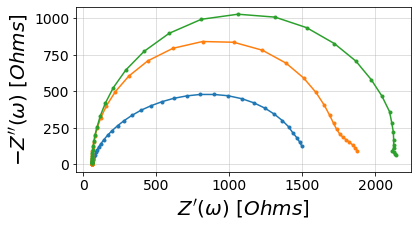

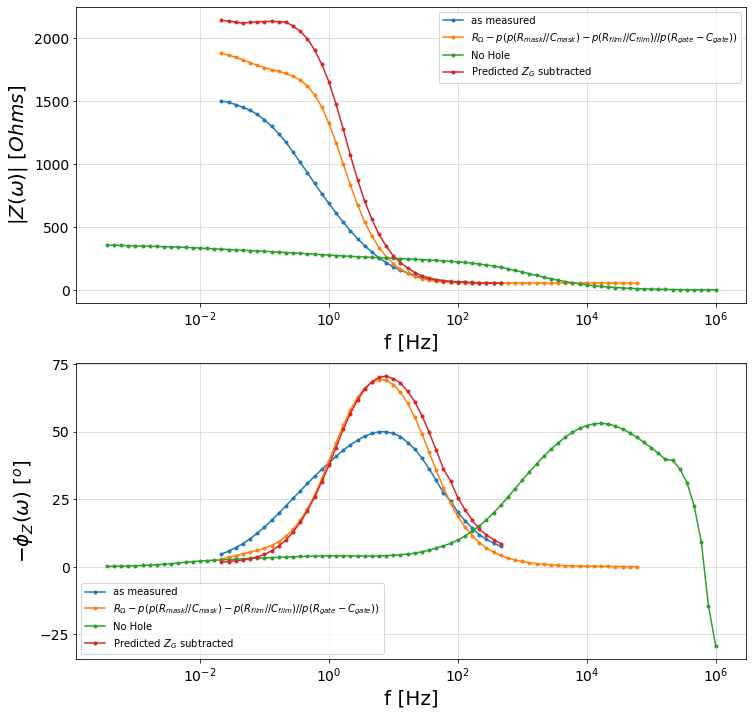

In [342]:
vals = [R_ohm1, R_mask, C_mask, R_film1, C_film1]
circ_MF_1 = CustomCircuit(circuit='R0-p(R1,C1)-p(R2,C2)', initial_guess=vals)
Z_circ_MF_1 = circ_MF_1.predict(fs_1)

vals = [R_ohm1, R_gate1, C_gate1]
circ_G_1 = CustomCircuit(circuit='R0-p(R3,C3)', initial_guess=vals)
Z_circ_G_1 = circ_G_1.predict(fs_1)

vals = [R_ohm1, R_mask, C_mask, R_film1, C_film1, R_gate1, C_gate1]
circ_MF_G_1 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R2,C2))', initial_guess=vals)
Z_circ_MF_G_1 = circ_MF_G_1.predict(fs_1)

vals = [R_ohm1, R_mask, C_mask, R_film1, C_film1, R_gate1, C_gate1, Rg_1, tg_1]
circ_Zg_G_MF_1 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_1 = circ_Zg_G_MF_1.predict(fs_1)


_, ax = plt.subplots()
plot_nyquist(ax, Zs_1+R_ohm1)
# plot_nyquist(ax, Z_circ_MF)
# plot_nyquist(ax, Z_circ_G)
plot_nyquist(ax, Z_circ_MF_G_1)
# plot_nyquist(ax, Z_circ_Zg_G_MF)
plot_nyquist(ax, Zsub_1+R_ohm1)

_, axes = plt.subplots(nrows=2, figsize=(12,12))
plot_bode(axes, fs_1[19:], Zs_1+R_ohm1, label=r'as measured')
# plot_bode(axes, fs_1, Z_circ_MF_1, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# plot_bode(axes, fs_1, Z_circ_G_1, label=r'$R_{\Omega}-p(R_{gate}//C_{gate}$)')
plot_bode(axes, fs_1, Z_circ_MF_G_1, label=r'$R_{\Omega}-p(p(R_{mask}//C_{mask})-p(R_{film}//C_{film})//p(R_{gate}-C_{gate}))$')
# plot_bode(axes, fs_1, Z_circ_Zg_G_MF_1, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
plot_bode(axes, fs_NH_1, Zs_NH_1, label='No Hole')
plot_bode(axes, fs_1[19:], Zsub_1+R_ohm1, label='Predicted $Z_G$ subtracted')
axes[0].legend()
axes[1].legend()
plt.show()

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


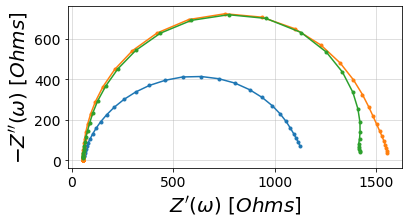

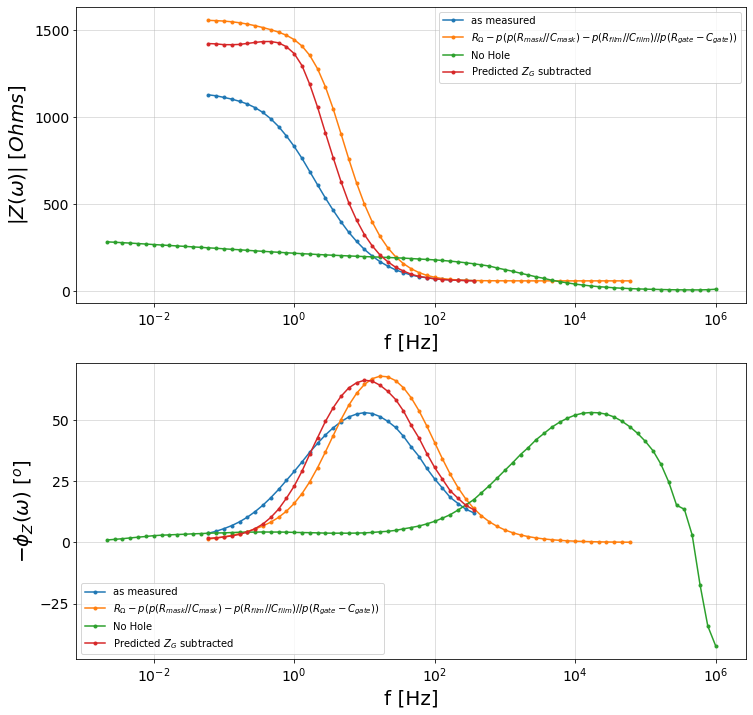

In [198]:
vals = [R_ohm10, R_mask, C_mask, R_film10, C_film10]
circ_MF_10 = CustomCircuit(circuit='R0-p(R1,C1)-p(R2,C2)', initial_guess=vals)
Z_circ_MF_10 = circ_MF_10.predict(fs_10)

vals = [R_ohm10, R_gate10, C_gate10]
circ_G_10 = CustomCircuit(circuit='R0-p(R3,C3)', initial_guess=vals)
Z_circ_G_10 = circ_G_10.predict(fs_10)

vals = [R_ohm10, R_mask, C_mask, R_film10, C_film10, R_gate10, C_gate10]
circ_MF_G_10 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R2,C2))', initial_guess=vals)
Z_circ_MF_G_10 = circ_MF_G_10.predict(fs_10)

vals = [R_ohm10, R_mask, C_mask, R_film10, C_film10, R_gate10, C_gate10, Rg_10, tg_10]
circ_Zg_G_MF_10 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_10 = circ_Zg_G_MF_10.predict(fs_1)

_, ax = plt.subplots()
plot_nyquist(ax, Zs_10+R_ohm10)
# plot_nyquist(ax, Z_circ_MF)
# plot_nyquist(ax, Z_circ_G)
plot_nyquist(ax, Z_circ_MF_G_10)
# plot_nyquist(ax, Z_circ_Zg_G_MF)
plot_nyquist(ax, Zsub_10+R_ohm10)

_, axes = plt.subplots(nrows=2, figsize=(12,12))
plot_bode(axes, fs_10[20:], Zs_10+R_ohm10, label=r'as measured')
# plot_bode(axes, fs_1, Z_circ_MF_1, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# plot_bode(axes, fs_1, Z_circ_G_1, label=r'$R_{\Omega}-p(R_{gate}//C_{gate}$)')
plot_bode(axes, fs_10, Z_circ_MF_G_10, label=r'$R_{\Omega}-p(p(R_{mask}//C_{mask})-p(R_{film}//C_{film})//p(R_{gate}-C_{gate}))$')
# plot_bode(axes, fs_1, Z_circ_Zg_G_MF_1, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
plot_bode(axes, fs_NH_10, Zs_NH_10, label='No Hole')
plot_bode(axes, fs_10[20:], Zsub_10+R_ohm10, label='Predicted $Z_G$ subtracted')
axes[0].legend()
axes[1].legend()
plt.show()

Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


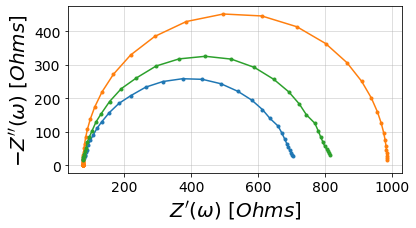

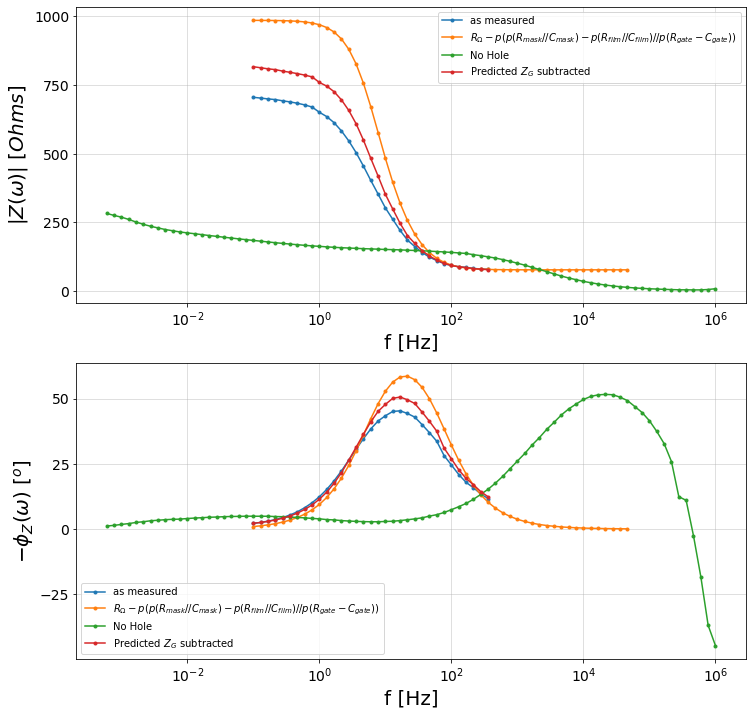

In [199]:
vals = [R_ohm100, R_mask, C_mask, R_film100, C_film100]
circ_MF_100 = CustomCircuit(circuit='R0-p(R1,C1)-p(R2,C2)', initial_guess=vals)
Z_circ_MF_100 = circ_MF_100.predict(fs_100)

vals = [R_ohm100, R_gate100, C_gate100]
circ_G_100 = CustomCircuit(circuit='R0-p(R3,C3)', initial_guess=vals)
Z_circ_G_100 = circ_G_100.predict(fs_100)

vals = [R_ohm100, R_mask, C_mask, R_film100, C_film100, R_gate100, C_gate100]
circ_MF_G_100 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R2,C2))', initial_guess=vals)
Z_circ_MF_G_100 = circ_MF_G_100.predict(fs_100)

vals = [R_ohm100, R_mask, C_mask, R_film100, C_film100, R_gate100, C_gate100, Rg_100, tg_100]
circ_Zg_G_MF_100 = CustomCircuit(circuit='R0-p(p(R1,C1)-p(R2,C2),p(R3,C3),G1)', initial_guess=vals)
Z_circ_Zg_G_MF_100 = circ_Zg_G_MF_100.predict(fs_1)

_, ax = plt.subplots()
plot_nyquist(ax, Zs_100+R_ohm100)
# plot_nyquist(ax, Z_circ_MF)
# plot_nyquist(ax, Z_circ_G)
plot_nyquist(ax, Z_circ_MF_G_100)
# plot_nyquist(ax, Z_circ_Zg_G_MF)
plot_nyquist(ax, Zsub_100+R_ohm100)

_, axes = plt.subplots(nrows=2, figsize=(12,12))
plot_bode(axes, fs_100[19:], Zs_100+R_ohm100, label=r'as measured')
# plot_bode(axes, fs_1, Z_circ_MF_1, label=r'$R_{\Omega}-p(R_{mask}//C_{mask})-p(R_{film}//C_{film}$)')
# plot_bode(axes, fs_1, Z_circ_G_1, label=r'$R_{\Omega}-p(R_{gate}//C_{gate}$)')
plot_bode(axes, fs_100, Z_circ_MF_G_100, label=r'$R_{\Omega}-p(p(R_{mask}//C_{mask})-p(R_{film}//C_{film})//p(R_{gate}-C_{gate}))$')
# plot_bode(axes, fs_1, Z_circ_Zg_G_MF_1, label=r'$R_{\Omega}-p(Z_G//p(R_{gate}//C_{gate})//p(R_{mask}//C_{mask})-p(R_{film}//C_{film}))$')
plot_bode(axes, fs_NH_100, Zs_NH_100, label='No Hole')
plot_bode(axes, fs_100[19:], Zsub_100+R_ohm100, label='Predicted $Z_G$ subtracted')
axes[0].legend()
axes[1].legend()
plt.show()

### Comparing all the full simulated circuits to measured data

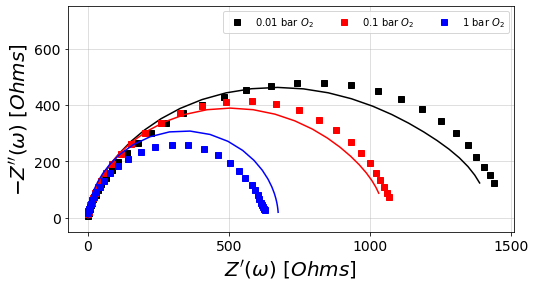

In [487]:
_, ax =plt.subplots(figsize=(8,6))
colors = ['k', 'r', 'b']
labels = ['0.01', '0.1', '1']
for i, (Z, Z_sim) in enumerate(zip([Zs_1, Zs_10, Zs_100], [Z_circ_Zg_G_MF_1-R_ohm1, Z_circ_Zg_G_MF_10-R_ohm10, Z_circ_Zg_G_MF_100-R_ohm100])):
    plot_nyquist(ax, Z, c=colors[i], fmt='s', label=labels[i]+' bar $O_2$')
    plot_nyquist(ax, Z_sim, c=colors[i], fmt='-')

ax.set_ylim(-50, 750)
ax.legend(ncol=3)
plt.savefig(r'Figures\\AsMeasured_and_AllParallelPathways_Nyquis.png',bbox_inches='tight', dpi=300)

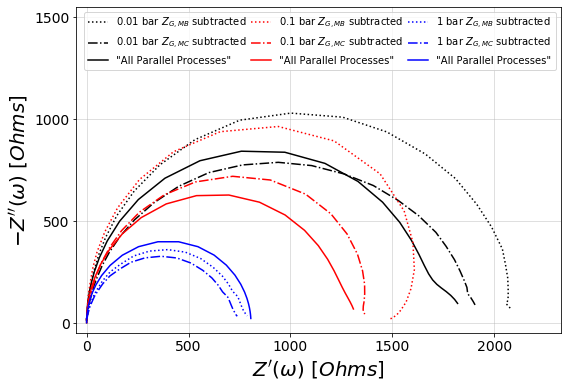

In [497]:
_, ax =plt.subplots(figsize=(9,6))
colors = ['k', 'r', 'b']
labels = ['0.01', '0.1', '1']
for i, (Z, Z_MC, Z_sim) in enumerate(zip([Zsub_1, Zsub_10, Zsub_100],[Zsub_1_MC, Zsub_10_MC, Zsub_100_MC], [Z_circ_MF_G_1-R_ohm1, Z_circ_MF_G_10-R_ohm10, Z_circ_MF_G_100-R_ohm100])):
    plot_nyquist(ax, Z, c=colors[i], fmt=':', label=labels[i] + ' bar $Z_{G,MB}$ subtracted')
    plot_nyquist(ax, Z_MC, c=colors[i], fmt='-.', label=labels[i] + ' bar $Z_{G,MC}$ subtracted')
    plot_nyquist(ax, Z_sim, c=colors[i], fmt='-', label='\"All Parallel Processes\"')

ax.set_ylim(-50, 1550)
ax.set_xlim(-50, 1550*1.5)
ax.legend(loc='upper right', ncol=3, columnspacing=0.5)
plt.savefig(r'Figures\\Zgsubtracted_and_AllParallelPathways_Nyquist.png',bbox_inches='tight', dpi=300)